In [1]:
import numpy as np
import pandas as pd 
 


In [2]:
df = pd.read_csv('Student_Performance.csv')

In [3]:
df.shape

(10000, 6)

In [4]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [5]:
import sklearn

In [7]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [12]:
df = df.rename(columns={'Hours Studied' : 'hours_studied' , 'Previous Scores' :'Previous_Scores' ,
                         'Extracurricular Activities' : 'Extracurricular_Activities' , 'Sleep Hours' : 'Sleep_Hours' ,
                           'Sample Question Papers Practiced' : 'Sample_Question_Papers_Practiced' ,
                             'Performance Index' : 'Performance_Index' })

In [8]:
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.model_selection import train_test_split

In [13]:
df.head()

,hours_studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Extracurricular_Activities = le.fit_transform(df.Extracurricular_Activities)
df.head()

,hours_studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [15]:
import seaborn as sns

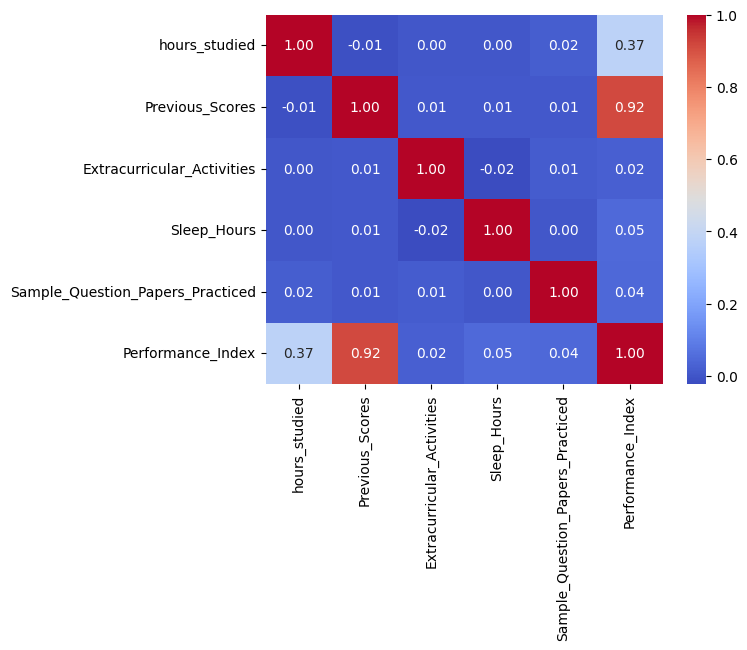

In [18]:
corrmatrix = df.corr()
sns.heatmap(corrmatrix , annot=True , cmap='coolwarm' , fmt=".2f")
plt.show()

In [19]:
x = df['Previous_Scores']
y=df['Performance_Index']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25)

In [21]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(x_train.values.reshape(-1,1) , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
y_pred = lr.predict(x_test.values.reshape(-1,1))

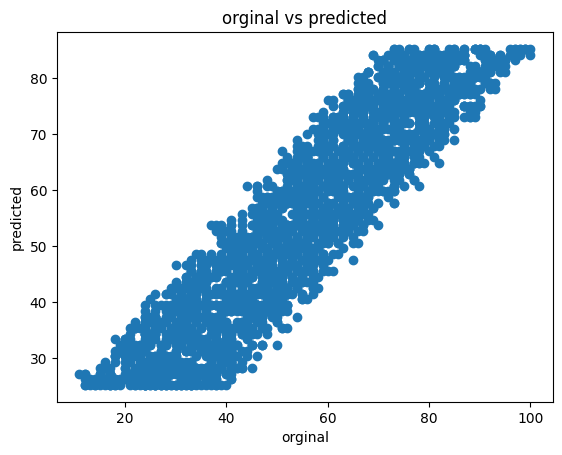

In [29]:
plt.Figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('orginal')
plt.ylabel('predicted')
plt.title('orginal vs predicted')
plt.show()